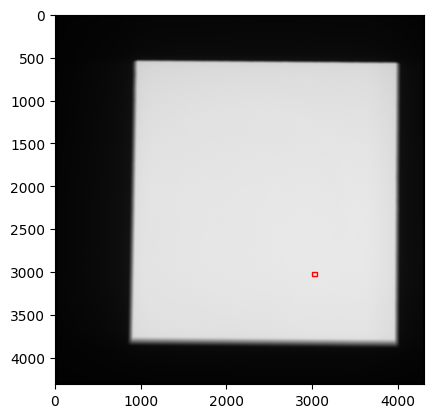

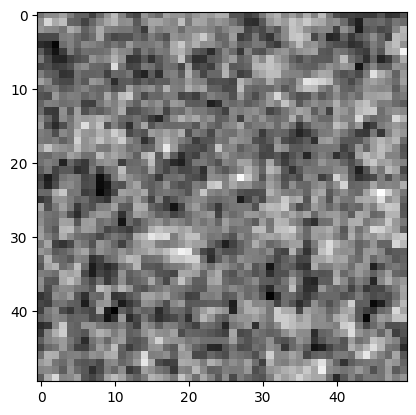

I;16B - тип изображения, (50, 50) - размер изображения,
среднее значение 12533 дисперсия 4049


In [327]:
from matplotlib import patches
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
path_elbow="C:\\Users\\lkond\\Desktop\\Python\\25_50kV_160mA_8mAs_50ms\\7.tiff"
imag = Image.open(path_elbow)
width=imag.width
height=imag.height
square=50 #Размер области
xleft_base=3000 #Стартовая координата для анализа (верхний левый угол прямоугольника)
yleft_base=3000
xright_base=xleft_base+square
yright_base=yleft_base+square
rect = patches.Rectangle(
    (xleft_base, yleft_base),           # левый верхний угол
    xright_base - xleft_base,            # ширина
    yright_base - yleft_base,            # высота
    linewidth=1,                # толщина линии
    edgecolor='red',            # цвет границы
    facecolor='none')            # без заливки
fig, ax = plt.subplots()
ax.add_patch(rect) #строим прямоугольник
plt.imshow(np.asarray(imag), cmap = 'gray')
plt.show()
coordinates_crop = (xleft_base, yleft_base, xright_base, yright_base) #Ось y направлена вниз, ось x вправо
imag_1 = imag.crop(coordinates_crop)
plt.imshow(np.asarray(imag_1), cmap = 'gray')
mean_s=int(np.mean(np.asarray(imag_1)))
var_s=int(np.var(np.asarray(imag_1)))
imag_corr=np.asarray(imag_1)
plt.show()
print(imag_1.mode, '- тип изображения,', imag_1.size, '- размер изображения,')
print('среднее значение', mean_s, 'дисперсия', var_s)

Средняя яркость пикселя 12517 Дисперсия пикселя 4815


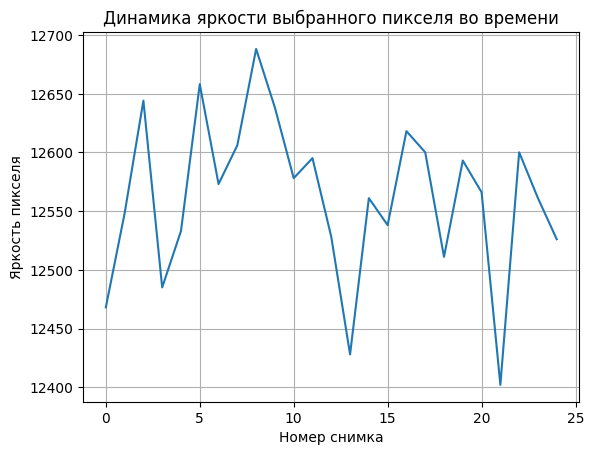

In [328]:
pixel_brightness=[]
j=int(imag_1.size[0]/4)
k=int(imag_1.size[0]/3) #Выбор пикселя
for i in range(25):
    path_elbow="C:\\Users\\lkond\\Desktop\\Python\\25_50kV_160mA_8mAs_50ms\\" + str(i+1) + ".tiff"
    img = Image.open(path_elbow)
    img = img.crop(coordinates_crop) #Обрезка тёмных краёв
    oblast_loop=np.asarray(img)
    pixel_brightness.append(int(oblast_loop[j][k])) #Выбор пикселя, считываем его яркость
print('Средняя яркость пикселя', mean_pixel, 'Дисперсия пикселя', var_pixel)
plt.plot(pixel_brightness)
plt.grid()
plt.xlabel('Номер снимка')
plt.ylabel('Яркость пикселя')
plt.title('Динамика яркости выбранного пикселя во времени')
plt.show()

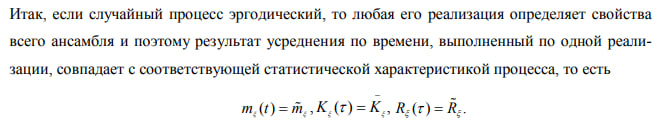

Посчитаем дисперсию для каждого пикселя

In [329]:
pixel_brightness=[]
pixel_brightness_total=[]
pixel_mean=[]
pixel_var=[]
for i in range(25):
    path_elbow="C:\\Users\\lkond\\Desktop\\Python\\25_50kV_160mA_8mAs_50ms\\" + str(i+1) + ".tiff"
    img = Image.open(path_elbow)
    img = img.crop(coordinates_crop) #Обрезка тёмных краёв
    oblast_loop=np.asarray(img)
    pixel_brightness=[]
    for k in range(imag_1.size[0]):
        for j in range(imag_1.size[0]):
            pixel_brightness.append(int(oblast_loop[j][k])) #Выбор пикселя, считываем его яркость
    pixel_brightness_total.append(pixel_brightness)
pixel_brightness_total=list(map(list, zip(*pixel_brightness_total))) #Транспонирование списка списков
for f in range(len(pixel_brightness_total)): #Cчитаем список Среднего и Дисперсии каждого пикселя за 10 снимков
    pixel_mean.append(int(np.mean(pixel_brightness_total[f]))) #среднее значение пикселя
    pixel_var.append(np.var(pixel_brightness_total[f])) #дисперсия пикселя
std_var_pixel=np.std(pixel_var)
std_mean_pixel=np.std(pixel_mean)
mean_var_pixel=np.mean(pixel_var)
mean_mean_pixel=np.mean(pixel_mean)

Построим график дисперсии для всех пикселей

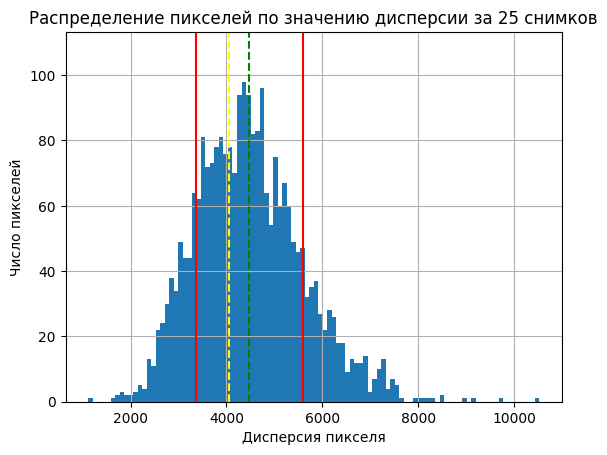

In [330]:
k_graph=[]
for k in range(len(pixel_var)): #Ось X
    k_graph.append(k+1)
y_hist, x_hist, _ = plt.hist(pixel_var, bins=100)
plt.axline((var_s, 1), (var_s, 1.1*int(y_hist.max())), linestyle='--', color = 'yellow') #Дисперсия по площади снимка
plt.axline((mean_var_pixel, 1), (mean_var_pixel, 1.1*int(y_hist.max())), linestyle='--', color = 'green') #Средняя дисперсия распределения
plt.axline((mean_var_pixel+std_var_pixel, 1), (mean_var_pixel+std_var_pixel, 1.1*int(y_hist.max())), color='Red') #+ СКО распределения пикселей
plt.axline((mean_var_pixel-std_var_pixel, 1), (mean_var_pixel-std_var_pixel, 1.1*int(y_hist.max())), color='Red') #- СКО распределения пикселей
plt.xlabel('Дисперсия пикселя')
plt.ylabel('Число пикселей')
plt.title('Распределение пикселей по значению дисперсии за 25 снимков')
plt.grid()
plt.show()

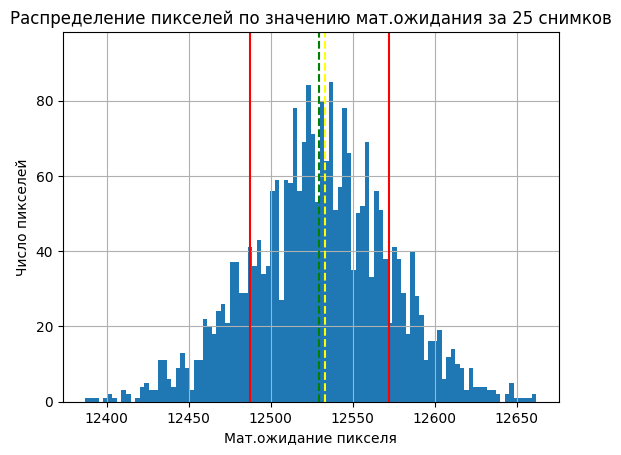

In [331]:
k_graph=[]
for k in range(len(pixel_mean)): #Ось X
    k_graph.append(k+1)
y_hist, x_hist, _ = plt.hist(pixel_mean, bins=100)
plt.axline((mean_s, 1), (mean_s, 1.1*int(y_hist.max())), linestyle='--', color = 'yellow') #Среднее площади снимка
plt.axline((mean_mean_pixel, 1), (mean_mean_pixel, 1.1*int(y_hist.max())), linestyle='--', color = 'green') #Средняя дисперсия распределения
plt.axline((mean_mean_pixel+std_mean_pixel, 1), (mean_mean_pixel+std_mean_pixel, 1.1*int(y_hist.max())), color='Red') #+ СКО распределения пикселей
plt.axline((mean_mean_pixel-std_mean_pixel, 1), (mean_mean_pixel-std_mean_pixel, 1.1*int(y_hist.max())), color='Red') #- СКО распределения пикселей
plt.xlabel('Мат.ожидание пикселя')
plt.ylabel('Число пикселей')
plt.title('Распределение пикселей по значению мат.ожидания за 25 снимков')
plt.grid()
plt.show()

Желтая линия отображает среднее значение по площади. Распределение имеет вид нормального. А значит процесс эргодичный

Проверим корреляцию для подтверждения незавимости сигналов. Будем перебирать пиксели снимка как будто это изменяется значение пикселя во времени. Посмотрим корреляцию двух "сигналов"

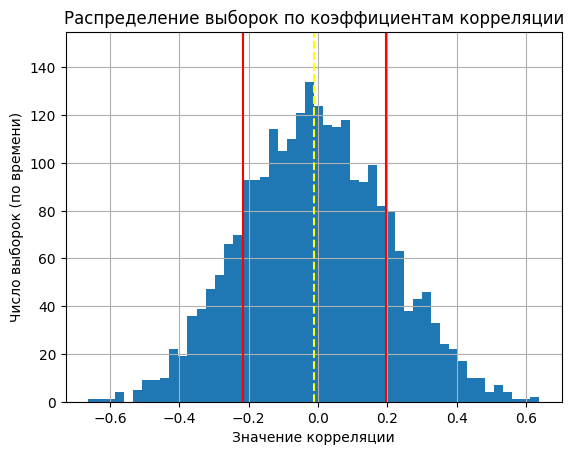

In [332]:
import secrets
corr_list=[]
for i in range(len(pixel_brightness_total)): #Итерируемся по списку яркостей всех пикселей
    random_selection=[]
    for j in range(len(pixel_brightness_total[0])):
        random_selection.append(int(secrets.choice(secrets.choice(imag_corr)))) #Вводим функцию для выбора случайного пикселя из площади
    corr_list.append(np.corrcoef(random_selection, pixel_brightness_total[i])[0][1]) #Записываем значение корреляции
y_hist_corr, x_hist_corr, _ = plt.hist(corr_list, bins=50)
std_corr=np.std(corr_list) #СКО распределения коэффициентов корреляции
mean_corr=np.mean(corr_list) #Среднее значение распределения коэффициентов корреляции
plt.axline((mean_corr, 1), (mean_corr, 1.1*int(y_hist_corr.max())), linestyle='--', color = 'yellow') #Среднее значение
plt.axline((mean_corr+std_corr, 1), (mean_corr+std_corr, 1.1*int(y_hist_corr.max())), color='Red') #+ СКО распределения
plt.axline((mean_corr-std_corr, 1), (mean_corr-std_corr, 1.1*int(y_hist_corr.max())), color='Red') #- СКО распределения
plt.xlabel('Значение корреляции')
plt.ylabel('Число выборок (по времени)')
plt.title('Распределение выборок по коэффициентам корреляции')
plt.grid()
plt.show()    
        

Вывод? Так как среднее гистограммы = 0, значит, что процессы не коррелированы. Что говорит о независимости значения пикселя во времени от случайной выборки пикселей по сечению процесса. А значит процессы независимы. 

Теперь проверим Пуассоновость процесса. Дисперсия должна линейно зависеть от мат.ожидания

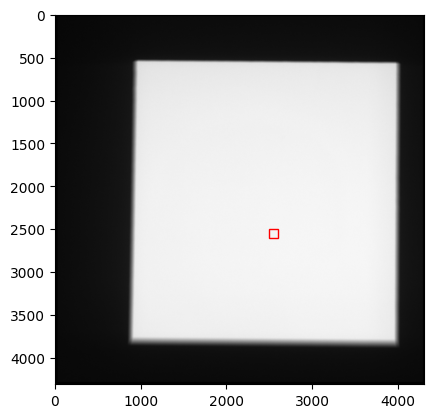

I;16B - тип изображения, (100, 100) - размер изображения,
среднее значение 3100 дисперсия 707


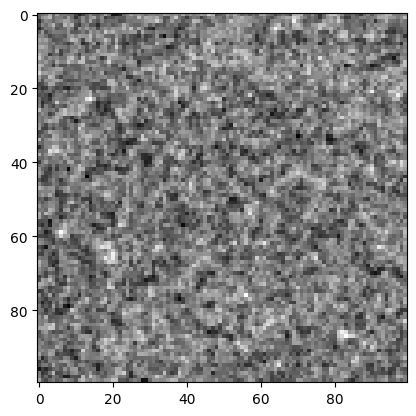

In [333]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
path_elbow="C:\\Users\\lkond\\Desktop\\Python\\9_lowing_intensity\\1.tiff"
imag = Image.open(path_elbow)
square_1=100 #Размер области
xleft_base_1=2500 #Стартовая координата для анализа (верхний левый угол прямоугольника)
yleft_base_1=2500
xright_base_1=xleft_base_1+square_1
yright_base_1=yleft_base_1+square_1
rect = patches.Rectangle(
    (xleft_base_1, yleft_base_1),           # левый верхний угол
    xright_base_1 - xleft_base_1,            # ширина
    yright_base_1 - yleft_base_1,            # высота
    linewidth=1,                # толщина линии
    edgecolor='red',            # цвет границы
    facecolor='none')            # без заливки
fig, ax = plt.subplots()
ax.add_patch(rect) #строим прямоугольник
plt.imshow(np.asarray(imag), cmap = 'gray')
plt.show()
coordinates_crop_1 = (xleft_base_1, yleft_base_1, xright_base_1, yright_base_1) #Ось y направлена вниз, ось x вправо
imag_1 = imag.crop(coordinates_crop_1)
mean_s1=int(np.mean(imag_1))
var_s1=int(np.var(imag_1))
plt.imshow(np.asarray(imag_1), cmap = 'gray')
print(imag_1.mode, '- тип изображения,', imag_1.size, '- размер изображения,')
print('среднее значение', mean_s1, 'дисперсия', var_s1)

3100.83 - средн.; 707.72 - Дисперсия;
2486.89 - средн.; 616.8 - Дисперсия;
1871.83 - средн.; 519.1 - Дисперсия;
4786.36 - средн.; 1147.66 - Дисперсия;
3854.77 - средн.; 849.87 - Дисперсия;
5845.52 - средн.; 1435.39 - Дисперсия;
7096.22 - средн.; 1784.84 - Дисперсия;
8647.13 - средн.; 2472.52 - Дисперсия;
10414.67 - средн.; 3174.58 - Дисперсия;


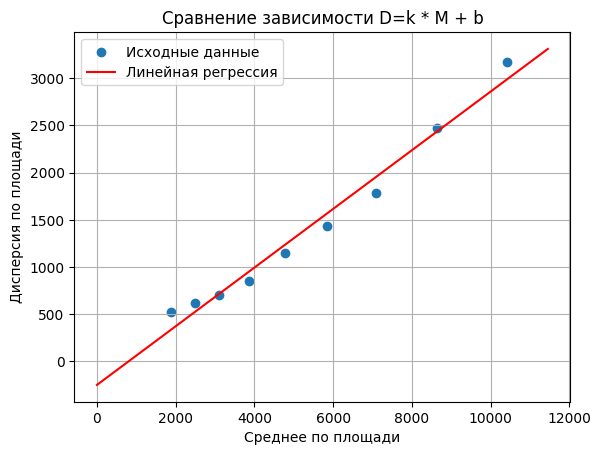

 Var = k*Mean + b
 k = 0.3107 b = -248.642


In [334]:
from scipy import stats
sredn_var=[]
sredn_mean=[]
for i in range(9):
    path_elbow="C:\\Users\\lkond\\Desktop\\Python\\9_lowing_intensity\\" + str(i+1) + ".tiff"
    img = Image.open(path_elbow)
    imag_region_loop = img.crop(coordinates_crop_1) #Обрезка тёмных краёв
    oblast_loop=np.asarray(imag_region_loop)
    mean=np.mean(oblast_loop) #Мат. ожидание
    var=np.var(oblast_loop) #Дисперсия
    print(round(mean,2), '- средн.;', round(var,2),'- Дисперсия;')
    sredn_var.append(round(var,2))
    sredn_mean.append(round(mean,2))
plt.scatter(sredn_mean, sredn_var, label='Исходные данные')
plt.grid()
plt.xlabel('Среднее по площади')
plt.ylabel('Дисперсия по площади')
plt.title('Сравнение зависимости D=k * M + b')
mean_line = stats.linregress(sredn_mean, sredn_var)
x=np.linspace(0, 1.1*max(sredn_mean), 20)
plt.plot(x, mean_line.intercept + mean_line.slope*x, 'r', label='Линейная регрессия')
plt.legend()
plt.show()
print(' Var = k*Mean + b\n','k =', round(mean_line.slope,4), 'b =', round(mean_line.intercept,4))